# Capstone Proposal: Speed Dating (Narrative Analytics and Experimentation)

## The Context

Source: Speed Dating Experiment - What attributes influence the selection of a romantic partner? https://www.kaggle.com/annavictoria/speed-dating-experiment

The dataset above consists of multi-layered findings from speed dating events between 2002-2004. Participants of these events were then asked, among other things, a) whether they would see their dates again, and b) to rate their prospective partners on Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. In the age of online dating, we are encouraged to make sweeping judgements on someone of the opposite sex. Quite literally. For millions of users on Tinder or its equivalents, romantic interest is established in a matter of seconds, with a right "swipe" after quickly skimming through a potential matches photos and "about me" section. It is because of our increasingly automated match making system that a closer look at its predecessor - speed dating - makes for an interesting narrative analytics case study. 

With this dataset, the Capstone seeks to examine inherent biases in dating - specifically, the power of the "unchangeable" - factors not limited to religion, race, and perceived physical attractiveness - in an individual's ability to secure a second date. If two people dating is contingent on a connection, how much of that connection is based on conditions beyond an individual's control? 

## Experimental Hypothesis

There is a strong correlation between religion/race/perceived attractiveness and the outcome of a speed dating exchange. Attractive participants of a certain race, religious leanings are more likely to receive positive ratings for Sincerity, Intelligence, Fun, Ambition, and Shared Interests.  

## Proposed Method of Testing

The Capstone will first evaluate religious and racial distinctions on both sides (male and female) of the speed dating exchange and the role it plays on ratings given on the attractiveness scale. In order to prevent a Simpson's paradox, the Capstone will classify individuals into six racial categories (as declared), and look into both trends for exchanges between those with same or different factors (same race exchanges, i.e.).

## Setting Up the Code

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
%matplotlib inline
df = pd.read_csv ('Speed Dating Data.csv',encoding='iso-8859-1')

In [185]:
df.shape

(8378, 195)

In [186]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [187]:
df.isnull().sum
#looking through null values

<bound method DataFrame.sum of         iid     id  gender    idg  condtn   wave  round  position  positin1  \
0     False  False   False  False   False  False  False     False      True   
1     False  False   False  False   False  False  False     False      True   
2     False  False   False  False   False  False  False     False      True   
3     False  False   False  False   False  False  False     False      True   
4     False  False   False  False   False  False  False     False      True   
5     False  False   False  False   False  False  False     False      True   
6     False  False   False  False   False  False  False     False      True   
7     False  False   False  False   False  False  False     False      True   
8     False  False   False  False   False  False  False     False      True   
9     False  False   False  False   False  False  False     False      True   
10    False  False   False  False   False  False  False     False      True   
11    False  False   

## Preliminary Observations

Text(0,0.5,'Participant Count')

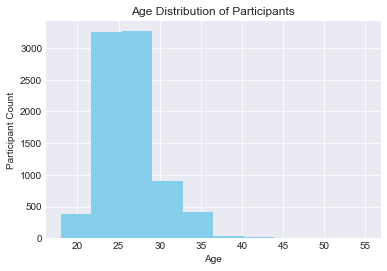

In [188]:
age = df[np.isfinite(df['age'])]['age']
plt.hist(age.values, color="skyblue")
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Participant Count')
#Participants in the mid-to-early thirties constitute the majority of this dataset

In [189]:
pd.crosstab(index=df['match'],columns="count")
#only 20 percent of participants got a match, or "Yes",to second date.

col_0,count
match,
0,6998
1,1380


In [190]:
columns=['iid','age','gender','idg', 'pid','match','samerace','age_o','race_o','dec_o','field_cd','race','imprace','imprelig','from','goal','date','go_out','career_c','sports',
'tvsports','exercise','dining','museums','art','hiking','gaming','clubbing', 'reading','tv','theater','movies','concerts','music','shopping','yoga','dec','attr','sinc','intel','fun','amb','like','prob','met']
df=df[columns]

In [191]:
df.dropna(inplace=True)
#Remove NaN values

In [192]:
df.head()

,iid,age,gender,idg,pid,match,samerace,age_o,race_o,dec_o,...,yoga,dec,attr,sinc,intel,fun,amb,like,prob,met
30,4,23.0,0,7,11.0,0,1,27.0,2.0,0,...,8.0,0,4.0,10.0,8.0,5.0,8.0,6.0,7.0,2.0
31,4,23.0,0,7,12.0,0,1,22.0,2.0,0,...,8.0,0,8.0,7.0,8.0,10.0,7.0,8.0,1.0,1.0
32,4,23.0,0,7,13.0,0,0,22.0,4.0,1,...,8.0,0,4.0,7.0,8.0,8.0,6.0,4.0,1.0,2.0
33,4,23.0,0,7,14.0,1,1,23.0,2.0,1,...,8.0,1,8.0,10.0,7.0,10.0,7.0,8.0,10.0,1.0
34,4,23.0,0,7,15.0,0,0,24.0,3.0,1,...,8.0,0,6.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0


In [193]:
#adding declared race and gender labels for participants
racelabels={ 1 : 'African American',
             2 : 'Caucasian',
             3 : 'Hispanic',
             4 : 'Asian',
             5 : 'Native American',
             6 : 'Other'}
#raceindex
def demography(n):
    if n < 1 or n > 6:
        return "N/A"
    return racelabels[n]

df['race']=df['race'].apply(demography)
df['race_o']=df['race_o'].apply(demography)

sex={0: 'female', 1: 'male'}
df['gender']=df['gender'].map(sex)

In [194]:
df_cleaned=df
df_cleaned.drop_duplicates(subset='iid', inplace=True)
df_cleaned.head()

,iid,age,gender,idg,pid,match,samerace,age_o,race_o,dec_o,...,yoga,dec,attr,sinc,intel,fun,amb,like,prob,met
30,4,23.0,female,7,11.0,0,1,27.0,Caucasian,0,...,8.0,0,4.0,10.0,8.0,5.0,8.0,6.0,7.0,2.0
40,5,21.0,female,9,11.0,0,1,27.0,Caucasian,0,...,3.0,0,5.0,8.0,8.0,2.0,2.0,7.0,5.0,2.0
50,6,23.0,female,11,11.0,0,0,27.0,Caucasian,0,...,1.0,1,6.0,9.0,7.0,6.0,7.0,6.0,6.0,2.0
60,7,22.0,female,13,11.0,0,0,27.0,Caucasian,0,...,10.0,0,4.0,8.0,8.0,5.0,7.0,7.0,4.0,2.0
70,8,25.0,female,15,11.0,0,1,27.0,Caucasian,0,...,6.0,1,5.0,8.0,7.0,4.0,7.0,4.0,5.0,2.0


In [195]:
data_race=pd.melt(df_cleaned, ['iid', 'gender','idg', 'pid', 'match', 'samerace', 'age_o', 'race_o',
                             'dec_o', 'field_cd', 'age', 'race', 'from', 'goal', 'date',
                             'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 
                             'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                             'concerts', 'music', 'shopping', 'yoga', 'dec', 'attr', 'sinc', 'intel', 'fun', 
                             'amb', 'like', 'prob', 'met'], var_name='importance')
data_race=data_race.rename(columns={'value' : 'score'})
data_race.reset_index(drop=True)

,iid,gender,idg,pid,match,samerace,age_o,race_o,dec_o,field_cd,...,attr,sinc,intel,fun,amb,like,prob,met,importance,score
0,4,female,7,11.0,0,1,27.0,Caucasian,0,1.0,...,4.0,10.0,8.0,5.0,8.0,6.0,7.0,2.0,imprace,1.0
1,5,female,9,11.0,0,1,27.0,Caucasian,0,1.0,...,5.0,8.0,8.0,2.0,2.0,7.0,5.0,2.0,imprace,8.0
2,6,female,11,11.0,0,0,27.0,Caucasian,0,1.0,...,6.0,9.0,7.0,6.0,7.0,6.0,6.0,2.0,imprace,1.0
3,7,female,13,11.0,0,0,27.0,Caucasian,0,1.0,...,4.0,8.0,8.0,5.0,7.0,7.0,4.0,2.0,imprace,2.0
4,8,female,15,11.0,0,1,27.0,Caucasian,0,13.0,...,5.0,8.0,7.0,4.0,7.0,4.0,5.0,2.0,imprace,1.0
5,9,female,17,11.0,0,0,27.0,Caucasian,0,13.0,...,8.0,10.0,9.0,8.0,7.0,5.0,5.0,2.0,imprace,1.0
6,10,female,19,11.0,0,1,27.0,Caucasian,0,13.0,...,6.0,10.0,10.0,6.0,6.0,6.0,3.0,2.0,imprace,4.0
7,11,male,2,1.0,0,0,21.0,Asian,1,8.0,...,6.0,8.0,8.0,8.0,8.0,7.0,4.0,2.0,imprace,7.0
8,12,male,4,1.0,0,0,21.0,Asian,1,1.0,...,7.0,8.0,10.0,7.0,7.0,8.0,4.0,2.0,imprace,1.0
9,13,male,6,1.0,1,1,21.0,Asian,1,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,imprace,3.0


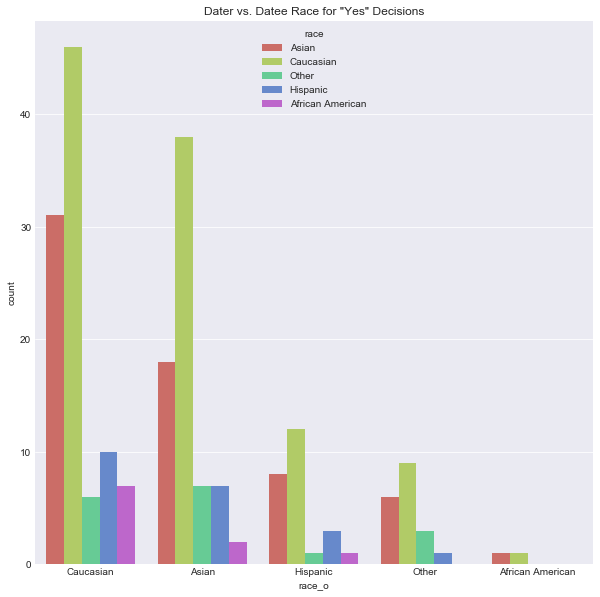

In [196]:
#This graph examines the races of both the partners chosen, and the race of said partners that chose them. 
df_yes=df_cleaned[df_cleaned['dec']==1]
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.title('Dater vs. Datee Race for "Yes" Decisions')
sns.countplot(x='race_o', data=df_yes, hue='race', palette='hls')

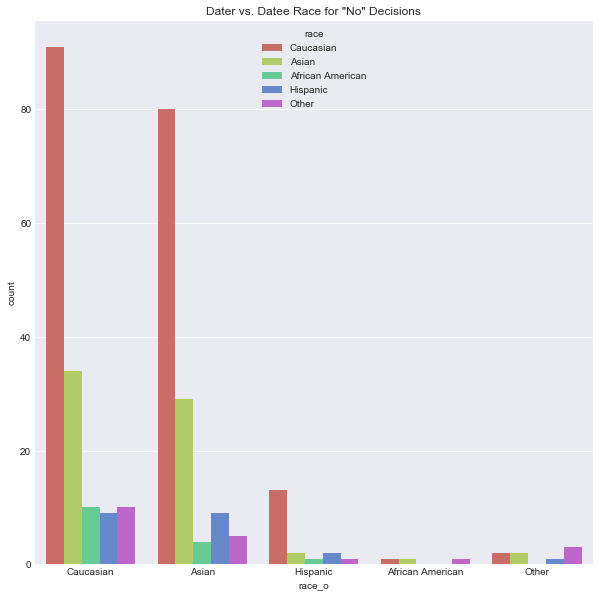

In [197]:
#This graph examines the races of both partners rejected, and the race of said partners that rejected them. 
df_no=df_cleaned[df_cleaned['dec']==0]
plt.figure(figsize=(10,10))
plt.title('Dater vs. Datee Race for "No" Decisions')
sns.countplot(x='race_o', data=df_no, hue='race', palette='hls')

## Delving Deeper: A Look at Caucasian Participants

In [214]:
#We'll be taking a closer look at Caucasian participants, who have received the most yes and no's from their prospective dates.
#total decisions for Caucasian participants, as well as their datees' race
df_white=df[df.race=='Caucasian']
df_white_dec=df_white[['race','gender','race_o','dec']].copy()
df_white_dec.shape

(293, 4)

In [213]:
#let's look at the datees saying yes. 
df_white_yes=df_white_dec[df_white_dec.dec==1]
df_white_yay=df_white_yes[['race','gender','race_o','dec']].copy()
df_white_yay.shape

(106, 4)

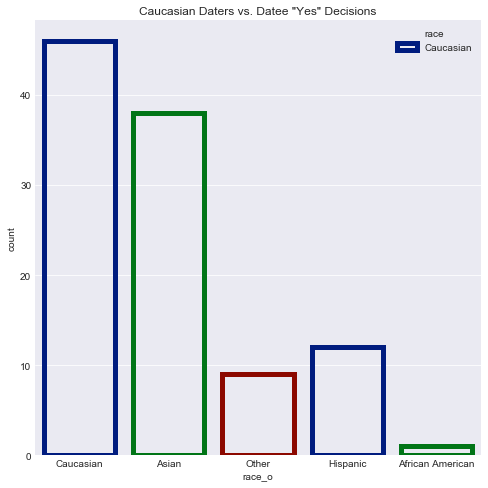

In [212]:
plt.figure(figsize=(8,8))
plt.title('Caucasian Daters vs. Datee "Yes" Decisions')
sns.countplot(x='race_o', data=df_white_yay, hue='race', facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))

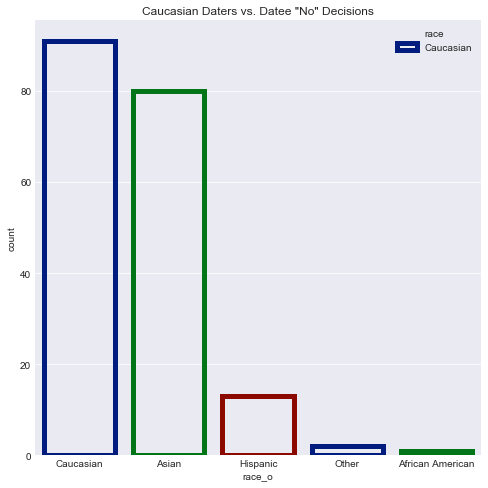

In [211]:
#And now, the nays
df_white_no=df_white_dec[df_white_dec.dec==0]
df_white_nay=df_white_no[['race','gender','race_o','dec']].copy()
plt.figure(figsize=(8,8))
plt.title('Caucasian Daters vs. Datee "No" Decisions')
sns.countplot(x='race_o', data=df_white_nay, hue='race', facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))

## Breaking Down Importance of Religion and Race

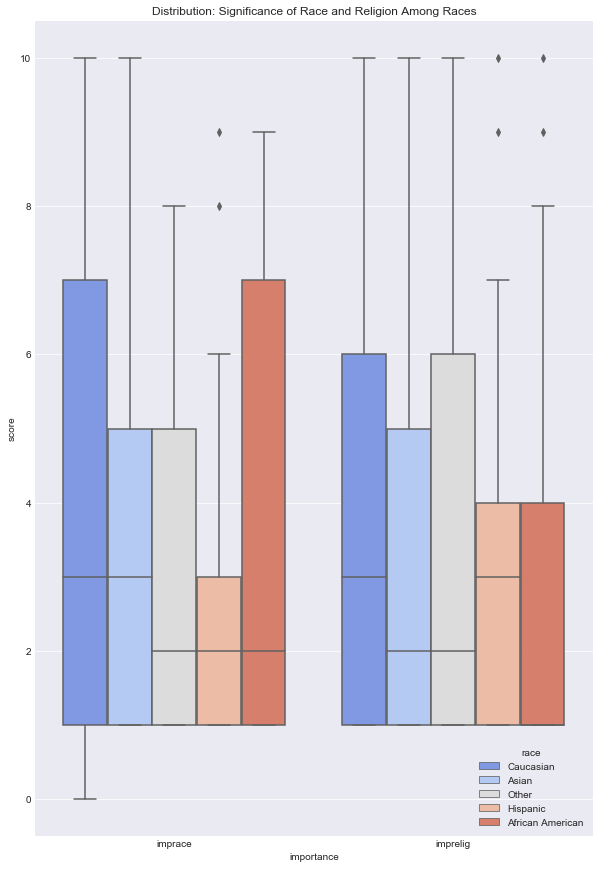

In [215]:
#Mean values for importance of race and religion in a partner are similar for most races.
#Greater importance is placed on religion for Hispanic participants. 
#Greater importance is placed on religion for Asian participants. For both, however, the differences are not significant.
plt.figure(figsize=(10,15))
plt.title('Distribution: Significance of Race and Religion Among Races')
sns.boxplot(x='importance', y='score', data=data_race, hue='race', palette="coolwarm")

## Going Forward - Future Questions

This proposal has kickstarted the investigation into a rather interesting dataset. The data has cleaned, and a closer look at more represented racial groups at this event (i.e. Caucasians), have been attempted. Despite the dataset's lack of religious labels for its participants, it has great potential for us to delve deeper into the role race plays in securing a second date. Now that we have a good idea of the preliminary findings, I will revisit this dataset to answer the following questions: 

a) How did same race partners at the event view each other? Are there clear indications of a preference within a racial group for marrying the same race as opposed to outmarriage? 
b) How do race and religion dynamics play out between male and female participants across the six racial groups? 
c) Is a certain race, paired with gender (i.e. "Hispanic" and "female") "popular? 